# This project is to predict whether a customer will leave a bank given several features

### 1. Importing Dataset

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

This project will use tensorflow as well as keras library for neural network

In [39]:
df = pd.read_csv('Churn_Modelling.csv')
df = df.drop(['RowNumber', 'CustomerId','Surname'], axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### 2.Data Wrangling

dropping useless columns

In [40]:
X = df.drop('Exited', axis=1)
y = df['Exited']

Checking missing values

In [41]:
#Checking missing values
df.isna().sum()
    #from sklearn.impute import SimpleImputer

    #imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
    #imputer.fit(X)
    #X = imputer.transform(X)

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### 3. Categorical Features encoding

In [42]:
#Encoding categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['Gender'] = le.fit_transform(X['Gender'])

In [43]:
#one hot encoding 
one_hot = pd.get_dummies(X['Geography'], dtype='float')
X = pd.concat([X, one_hot], axis=1).drop('Geography', axis=1)

### 4. Splitting dataset

In [44]:
#splitting dataset into training and test set

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### 5. Feature Scaling

In [45]:
#scaling as neural network requires to scale all features regardless of binary
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

### 6. Building Artificial Neural Network

In [46]:
#building artifical neural network
nn = tf.keras.models.Sequential()

In [47]:
#adding layers in nn

nn.add(tf.keras.layers.Dense(units=6, activation='relu')) #first hidden layer
nn.add(tf.keras.layers.Dense(units=6, activation='relu')) #second hidden layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid')) #output layer

#compiling nn
nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) #binary : binary_crossentropy, non-binary classification : categorical_crossentropy, activation = softmax
#adam = stochastic gradient descent
nn.fit(x_train, y_train, batch_size=32, epochs=100) #batch learning to hasten the process, epochs = n-iterations

Epoch 1/100


250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step - accuracy: 0.6236 - loss: 0.6318
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step - accuracy: 0.7985 - loss: 0.4870
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step - accuracy: 0.7911 - loss: 0.4619
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step - accuracy: 0.8048 - loss: 0.4263
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step - accuracy: 0.7978 - loss: 0.4299
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step - accuracy: 0.7888 - loss: 0.4436
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step - accuracy: 0.8050 - loss: 0.4224
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step - accuracy: 0.8046 - loss: 0.4209
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step - accuracy: 0.8061 - loss: 0.4121
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step - accuracy: 0.8169 - loss: 0.3952
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step - accuracy: 0.8327 - loss: 0.3894
Epoch 12/100
250/250 ━━━━━━━━━━

### 7. Benchmark on Test set and confusion matrix

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 624us/step


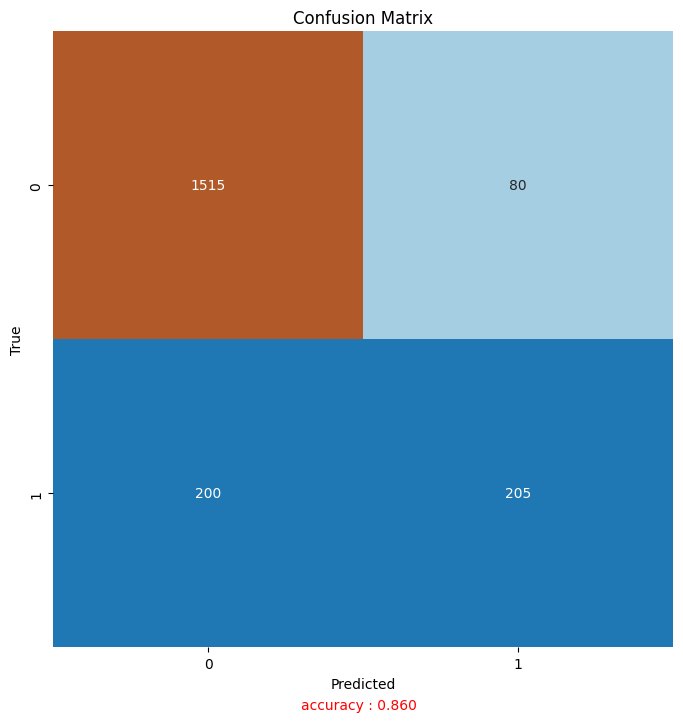

In [48]:
y_pred = nn.predict(x_test)
y_pred = (y_pred > 0.5) #to convert y_pred from probability to binary with threshold of 0.5
from sklearn.metrics import accuracy_score, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt='d', cbar=None, cmap=sns.color_palette('Paired', as_cmap=True))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.text(0.8, 2.2, f'accuracy : {accuracy_score(y_test, y_pred):.3f}', color='red')
plt.show()